<a href="https://colab.research.google.com/github/fedhere/DSPS/blob/master/HW6/SNdataLineFit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import pylab as pl
%pylab inline
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


#### Objective: fit supernova cosmology data : the linear relationship between logarithm redshift and luminosity of supernovae is evidence of the expansion of the Universe. In this homework you will fit the supernova data with a line, in the next class we will discover evidence of the *accelerated* expansion of the Universe

# Get the data

Download the supernova (SN) data used in the Betoule 2014 paper https://arxiv.org/abs/1401.4064. The data can be obtained here 
http://supernovae.in2p3.fr/sdss_snls_jla/ReadMe.html

As it says on the webpage: "The JLA C++ code and data are available from a single archive: jla_likelihood_v6.tgz". 
Download it and unpack it (untar unzip) within the notebook (mounting your drive on colab etc) and move the data to the folder /drive/My Drive/dsps/data

The input data file is named jla_lcparams.txt


In [2]:
from google.colab import drive
drive.mount("/content/drive")


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd 'drive/My Drive/dsps/'

/content/drive/My Drive/dsps


In [0]:
# download the data

!wget http://supernovae.in2p3.fr/sdss_snls_jla/jla_likelihood_v6.tgz

--2019-10-11 01:21:10--  http://supernovae.in2p3.fr/sdss_snls_jla/jla_likelihood_v6.tgz
Resolving supernovae.in2p3.fr (supernovae.in2p3.fr)... 134.158.152.153
Connecting to supernovae.in2p3.fr (supernovae.in2p3.fr)|134.158.152.153|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23716633 (23M) [application/x-gzip]
Saving to: ‘jla_likelihood_v6.tgz’

jla_likelihood_v6.t 100%[===================>]  22.62M  5.92MB/s    in 5.0s    

2019-10-11 01:21:16 (4.52 MB/s) - ‘jla_likelihood_v6.tgz’ saved [23716633/23716633]



In [0]:
ls *.tgz

jla_likelihood_v6.tgz


In [0]:
# unzip 
!tar zxvf jla_likelihood_v6.tgz

jla_likelihood_v6/src/ini.o
jla_likelihood_v6/src/ini.h
jla_likelihood_v6/src/jla.cc
jla_likelihood_v6/src/ini.c
jla_likelihood_v6/src/jla.o
jla_likelihood_v6/src/test.cc
jla_likelihood_v6/src/jla.h
jla_likelihood_v6/src/test.o
jla_likelihood_v6/makefile
jla_likelihood_v6/data/jla_v0b_covmatrix.dat
jla_likelihood_v6/data/jla_mub_covmatrix.dat
jla_likelihood_v6/data/jla_v0_covmatrix.dat
jla_likelihood_v6/data/jla_mub.txt~
jla_likelihood_v6/data/jla_vab_covmatrix.dat
jla_likelihood_v6/data/JLA.paramnames
jla_likelihood_v6/data/jla.dataset
jla_likelihood_v6/data/jla_va_covmatrix.dat
jla_likelihood_v6/data/jla_mub.txt
jla_likelihood_v6/data/jla_lcparams.txt
jla_likelihood_v6/data/jla_simple.dataset~
jla_likelihood_v6/data/jla_vb_covmatrix.dat
jla_likelihood_v6/data/jla_v0a_covmatrix.dat
jla_likelihood_v6/data/jla_simple.dataset
jla_likelihood_v6/ReadMe.txt
jla_likelihood_v6/LICENSE.txt


In [0]:
jla = pd.read_csv("jla_likelihood_v6/data/jla_lcparams.txt", sep=" ")

In [5]:
jla.head()

,#name,zcmb,zhel,dz,mb,dmb,x1,dx1,color,dcolor,3rdvar,d3rdvar,tmax,dtmax,cov_m_s,cov_m_c,cov_s_c,set,ra,dec,biascor
0,03D1au,0.503084,0.5043,0,23.001698,0.088031,1.273191,0.150058,-0.012353,0.030011,9.517,0.1105,52909.745220,0.214332,0.000790,0.000440,-0.000030,1,36.043210,-4.037469,0.001697
1,03D1aw,0.580724,0.5820,0,23.573937,0.090132,0.974346,0.273823,-0.025076,0.036691,9.169,0.0880,52902.898002,0.352732,0.002823,0.000415,0.001574,1,36.061634,-4.517158,0.000843
2,03D1ax,0.494795,0.4960,0,22.960139,0.088110,-0.728837,0.102069,-0.099683,0.030305,11.580,0.1125,52915.923670,0.111634,0.000542,0.000475,-0.000024,1,36.097287,-4.720774,0.001692
3,03D1bp,0.345928,0.3470,0,22.398137,0.087263,-1.155110,0.112834,-0.040581,0.026679,10.821,0.1235,52920.249015,0.102828,0.001114,0.000616,0.000295,1,36.657235,-4.838779,-0.000270
4,03D1co,0.677662,0.6790,0,24.078115,0.098356,0.618820,0.404295,-0.039380,0.067403,8.647,0.2840,52954.458342,0.454715,0.011857,0.000780,0.005898,1,36.567748,-4.935050,-0.002855


In [0]:
jla.describe()

,zcmb,zhel,dz,mb,dmb,x1,dx1,color,dcolor,3rdvar,d3rdvar,tmax,dtmax,cov_m_s,cov_m_c,cov_s_c,set,ra,dec,biascor
count,740.000000,740.000000,740.0,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,0.323804,0.324449,0.0,20.904956,0.115913,0.036599,0.311099,-0.023862,0.038897,9.795341,0.827140,53527.309187,0.382252,0.006210,0.000645,0.002665,1.860811,93.551713,5.726200,-0.004195
std,0.276869,0.276748,0.0,2.655143,0.018761,0.988559,0.211398,0.084112,0.015706,1.395068,3.369119,1023.254711,0.299172,0.010127,0.000947,0.005317,0.715821,119.504602,22.728815,0.006796
min,0.010060,0.009370,0.0,14.148421,0.085341,-2.862959,0.017738,-0.250149,0.011882,5.000000,0.004500,48076.401017,0.021321,-0.044995,-0.004558,-0.011397,1.000000,-55.207462,-66.485085,-0.036389
25%,0.124240,0.124418,0.0,19.735791,0.101604,-0.650131,0.148408,-0.084578,0.026015,9.316750,0.106875,53360.155972,0.164968,0.000646,0.000440,0.000061,1.000000,4.812357,-1.037904,-0.008439
50%,0.229045,0.230515,0.0,21.098947,0.114480,0.165391,0.267931,-0.030434,0.034759,10.193500,0.182750,53685.973783,0.307975,0.003097,0.000630,0.000919,2.000000,36.667567,0.237261,-0.001083
75%,0.498216,0.499000,0.0,23.043200,0.124173,0.775606,0.420354,0.030961,0.049647,10.710250,0.290500,54041.338277,0.509950,0.008213,0.000971,0.003591,2.000000,190.881058,2.146795,-0.000380
max,1.299106,1.300000,0.0,26.046776,0.174566,2.337170,1.641345,0.259538,0.106505,11.817000,54.194000,54555.109466,2.336975,0.069409,0.008604,0.053578,4.000000,359.635090,79.031740,0.002649


In [0]:
jla.columns

Index(['#name', 'zcmb', 'zhel', 'dz', 'mb', 'dmb', 'x1', 'dx1', 'color',
       'dcolor', '3rdvar', 'd3rdvar', 'tmax', 'dtmax', 'cov_m_s', 'cov_m_c',
       'cov_s_c', 'set', 'ra', 'dec', 'biascor'],
      dtype='object')

In [0]:
jla.dtypes

#name       object
zcmb       float64
zhel       float64
dz           int64
mb         float64
dmb        float64
x1         float64
dx1        float64
color      float64
dcolor     float64
3rdvar     float64
d3rdvar    float64
tmax       float64
dtmax      float64
cov_m_s    float64
cov_m_c    float64
cov_s_c    float64
set          int64
ra         float64
dec        float64
biascor    float64
dtype: object

Use pandas scatter matrix to see the relationship between variables 

(Lab6). If you look in HW5 you can see how to rotate the labels

In [0]:
def rotate_ax(axs):
    n = len(axs)
    for x in range(n):
        for y in range(n):
            # to get the axis of subplots
            ax = axs[x, y]
            # to make x axis name vertical  
            ax.xaxis.label.set_rotation(90)
            # to make y axis name horizontal 
            ax.yaxis.label.set_rotation(0)
            # to make sure y axis names are outside the plot area
            ax.yaxis.labelpad = 50


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[i])


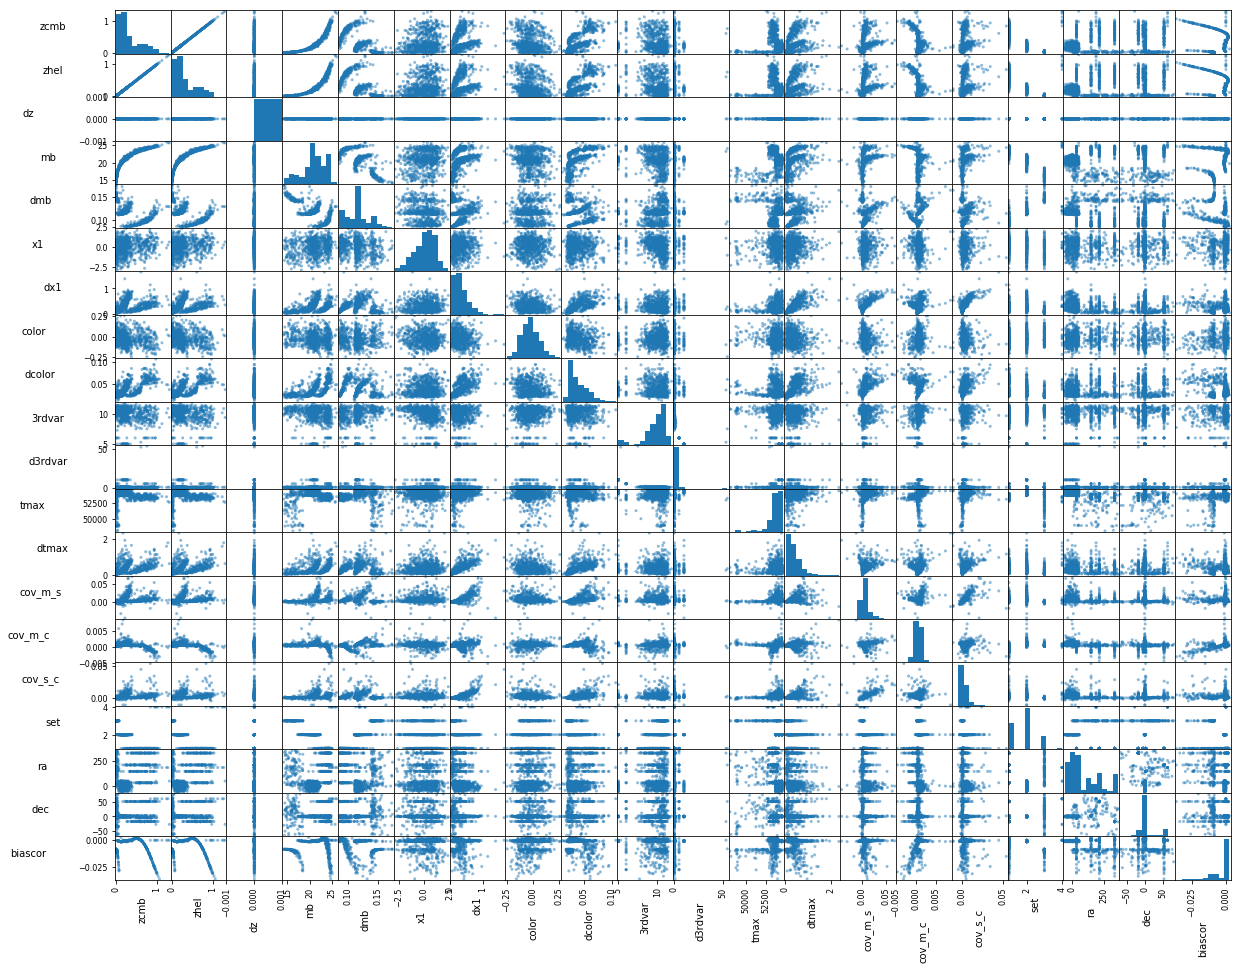

In [111]:
axs = pd.plotting.scatter_matrix(jla, figsize=(20, 16))
rotate_ax(axs)

Fig. The scatter matrix of all columns.

The target variables for our analysis are redshift and brightness: "zcmb" and "mb". This an exercise about fitting lines to data. Why does it lot look like there is a line relationship between them? How can does the relationship look? Plot the "zcmb" vs "mb". Include the y uncertainty which is reported in "dmb". Plot each data point with a different color based on the survey it comes from. The survey data is indicated by the variable "set". To do it you can use the dataframe plotting methods (```df.plot.scatter()```),  or pylab:  ```pylab.scatter()```, or ```pylab.plot()``` --asking to plot the data as point ('.')-- but for each the way you relate the color to a column value is a bit different. Stackoverflow is your friend here!

Text(0, 0.5, 'mb')

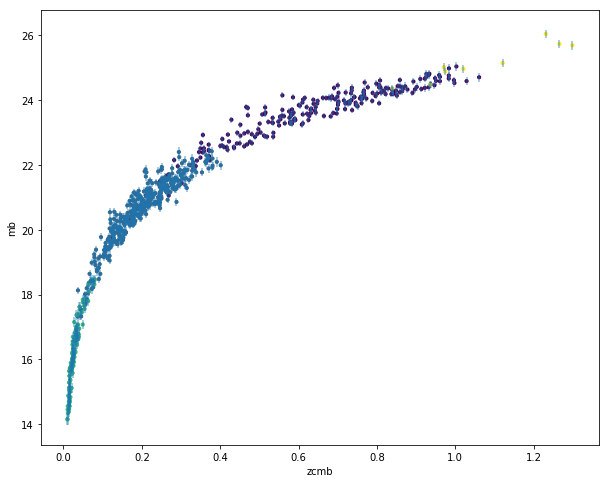

In [112]:
pl.figure(figsize=(10, 8))
pl.scatter(x=jla.zcmb, y=jla.mb, c=jla.set, s=10)
pl.errorbar(x=jla.zcmb, y=jla.mb, yerr=jla.dmb, linestyle='None', alpha=0.5)
pl.xlabel('zcmb')
pl.ylabel('mb')

Figure 1. The brightness mb vs. redshift zcmb with errorbar. The color indicates the survey set.

It is a **power law**, which means it will be linear in logarithmic space - specifically in log10(_x_) vs natural _y_ space.

Replot the data with natural y axis and logarithmic x axis, you can do that by taking the log of the data and then plotting it or by using plot functionalities (e.g. for ```df.plot.scatter()``` you can use ```logx=True```)

Note that when we talk about log we (generally) talk about log base 10! 


Text(0, 0.5, 'mb')

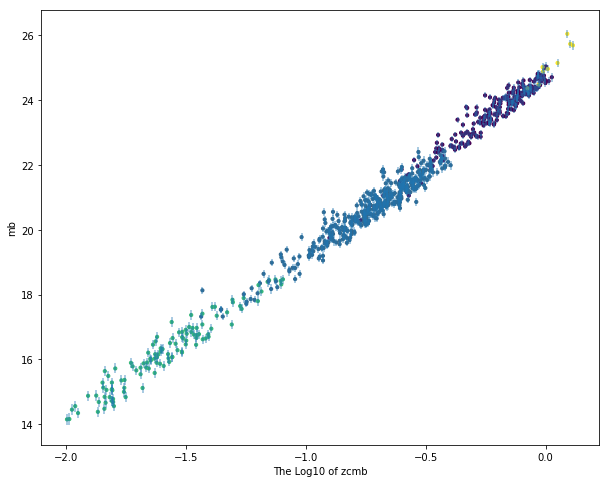

In [113]:
pl.figure(figsize=(10, 8))
log_zcmb = np.log10(jla.zcmb)
pl.scatter(x=log_zcmb, y=jla.mb, c=jla.set, s=10)
pl.errorbar(x=log_zcmb, y=jla.mb, yerr=jla.dmb, 
            linestyle='None', alpha=0.5)
pl.xlabel('The Log10 of zcmb')
pl.ylabel('mb')

Figure 2. The mb vs. Log10 of zcmb. There is a linear relationship between them. 

# Fit a line to the data with scipy

For each model you fit below you should make a plot of the data and the model. Consider your fit to the data with the uncertainties your "baseline fit"

Like we did in class: fit a line using ```scipy.optimize``` (lab 5). Do it without and with the uncertainties on your _y_ data (the ```curvefit``` argument to include uncertainties in the endogenous variable is ```sigma```). Report the variace and the covariance by printing your mode uncertainties explicitly as below:





In [0]:
def line(x, a, b):
    '''define a line
    '''
    y = a * x + b
    return y

In [115]:
# curve fit without uncertainties
popt, pconv = curve_fit(f=line, xdata=log_zcmb, ydata=jla.mb)

print('curve fit result without uncertainties \n' 
      + 'slope = {} +/- {} \n'.format(popt[0], pconv[0,0])
      + 'intercept = {} +/- {} \n'.format(popt[1], pconv[1,1])
      + 'parameters covariance = {}'.format(pconv[0, 1]))

curve fit result without uncertainties 
slope = 5.372054832571733 +/- 0.0004949275228694857 
intercept = 24.656230530049633 +/- 0.00036056445275285285 
parameters covariance = 0.0003456050428525341


In [116]:
popt_line, pconv_line = curve_fit(f=line, xdata=log_zcmb, ydata=jla.mb, sigma=jla.dmb)

print('curve fit result with uncertainties \n' 
      + 'slope = {} +/- {} \n'.format(popt_line[0], pconv_line[0,0])
      + 'intercept = {} +/- {} \n'.format(popt_line[1], pconv_line[1,1])
      + 'parameters covariance = {}'.format(pconv_line[0, 1]))

curve fit result with uncertainties 
slope = 5.425990163633592 +/- 0.0006039993135096203 
intercept = 24.69611560038359 +/- 0.0003285264059856584 
parameters covariance = 0.00035954358014688413


hint: remember to sort the data!

plot the data like you did above and the model you just created including the uncertainty band (look at lab5: there is a mistake we made in class which I corrected in the version I uploaded)

Text(0, 0.5, 'mb')

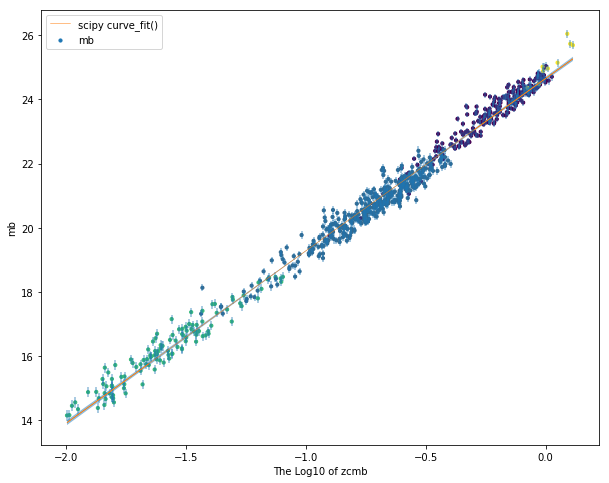

In [120]:
pl.figure(figsize=(10, 8))
log_zcmb = np.log10(jla.zcmb)
pl.scatter(x=log_zcmb, y=jla.mb, c=jla.set, s=10)
pl.errorbar(x=log_zcmb, y=jla.mb, yerr=jla.dmb, 
            linestyle='None', alpha=0.5, label=None)

#plot fit line
y_fit = line(log_zcmb, *popt)
pl.plot(log_zcmb, y_fit, linewidth=0.5, label='scipy curve_fit()')

# plot fit uncertainty
y_fit_1 = line(log_zcmb, popt[0] + 3*pconv[0, 0]**0.5, popt[1] + 3*pconv[1,1]**0.5)
y_fit_2 = line(log_zcmb, popt[0] - 3*pconv[0, 0]**0.5, popt[1] - 3*pconv[1,1]**0.5)
sorter = np.argsort(log_zcmb)
pl.fill_between(log_zcmb[sorter], y_fit_1[sorter], y_fit_2[sorter], alpha=0.5)

pl.legend()
pl.xlabel('The Log10 of zcmb')
pl.ylabel('mb')

Figure 3. Linear fitting using scipy curve_fit() between mb and Log10 of zcmb.

Compare the *model* values and uncertainty you obtained by fitting the model with and without including the uncertainties on the y values.  Comment on your findings.

> The model values are very close to each other. But the model values by fitting the model with uncertainties have a slighter larger uncertainties. This result is as expected.

Now fit the data using only 1 every 20 points - use this: https://stackoverflow.com/questions/25876640/subsampling-every-nth-entry-in-a-numpy-array

Plot the new model and its uncertainty band and comment on the model: how do the three models compare?

> The model values using only 1 every 20 points have the largest uncertainties. The model values using all data data points by fitting without using uncertainties in data have the least uncertainties. 

In [123]:
# choose data, 1 every 20 points
xdata = log_zcmb[1::20]
ydata = jla.mb[1::20]
sigma = jla.dmb[1::20]
subset = jla.set[1::20]
popt, pconv = curve_fit(f=line, xdata=xdata, ydata=ydata, sigma=sigma)

print('curve fit using only 1 every 20 points with uncertainties \n' 
      + 'slope = {} +/- {} \n'.format(popt[0], pconv[0,0])
      + 'intercept = {} +/- {} \n'.format(popt[1], pconv[1,1])
      + 'parameters covariance = {}'.format(pconv[0, 1]))

curve fit using only 1 every 20 points with uncertainties 
slope = 5.5738305595845 +/- 0.008628925253711813 
intercept = 24.761161978773064 +/- 0.004348179163025816 
parameters covariance = 0.004932485731964964


Text(0, 0.5, 'mb')

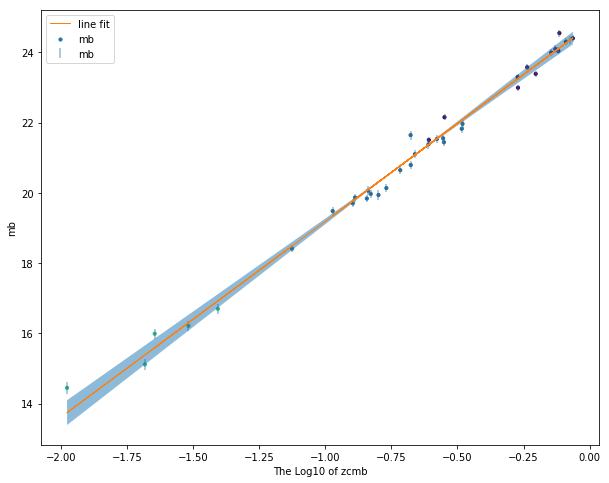

In [124]:
pl.figure(figsize=(10, 8))

pl.scatter(x=xdata, y=ydata, c=subset, s=10)
pl.errorbar(x=xdata, y=ydata, yerr=sigma, 
            linestyle='None', alpha=0.5)

#plot fit line
y_fit = line(xdata, *popt)
pl.plot(xdata, y_fit, linewidth=1.0, label='line fit')

# plot fit uncertainty
y_fit_1 = line(xdata.values, popt[0] + 3*pconv[0, 0]**0.5, popt[1] + 3*pconv[1,1]**0.5)
y_fit_2 = line(xdata.values, popt[0] - 3*pconv[0, 0]**0.5, popt[1] - 3*pconv[1,1]**0.5)
sorter = np.argsort(xdata)
pl.fill_between(xdata.values[sorter], y_fit_1[sorter], y_fit_2[sorter], alpha=0.5)

pl.legend()
pl.xlabel('The Log10 of zcmb')
pl.ylabel('mb')


Figure 4. Linear fitting result with the data using only 1 every 20 points. The new model has larger uncertainties due to less data points.

# Fit a quadratic equation

Use the same function ```curve_fit()``` to fit a quadratic equation to the data. 
The equation is below

Plot your data, your original model which included uncertainties, and the current quadratic model


In [0]:
def quad(x, a, b, c):
    '''Quadratic equation
    Input:
    x: array-like, the exogenous variable
    a: parameters of the quadratic term
    b: parameter of the linear term
    c: intercept
    
    '''
    return a * x**2 + b * x + c


In [106]:
# fit quadratic
popt_quad, pconv_quad = curve_fit(f=quad, xdata=log_zcmb, ydata=jla.mb, sigma=jla.dmb)

print('fit a quadratic function with uncertainties \n' 
      + 'a = {} +/- {} \n'.format(popt_quad[0], pconv_quad[0,0])
      + 'b = {} +/- {} \n'.format(popt_quad[1], pconv_quad[1,1])
      + 'c = {} +/- {} \n'.format(popt_quad[2], pconv_quad[2,2])
      + 'parameters covariance matrix\n {}'.format(pconv_quad))


fit a quadratic function with uncertainties 
a = 0.3482312910331671 +/- 0.0017231526479384092 
b = 5.984600686838434 +/- 0.004986209716352787 
c = 24.839231082342074 +/- 0.000591343458473376 
parameters covariance matrix
 [[0.00172315 0.00276417 0.00070818]
 [0.00276417 0.00498621 0.00146466]
 [0.00070818 0.00146466 0.00059134]]


Text(0, 0.5, 'mb')

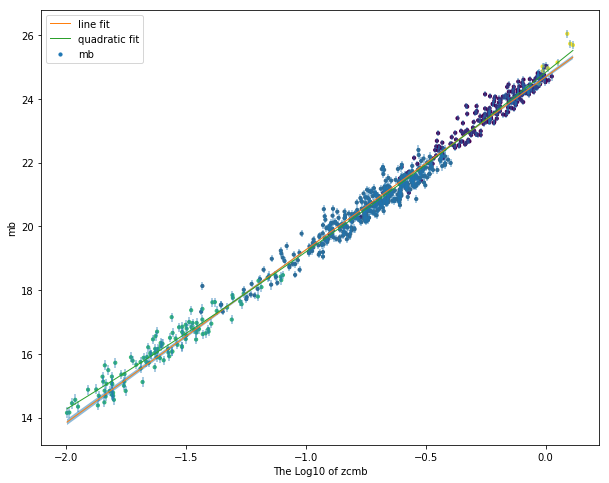

In [126]:
# Plot the data, linear model which included uncertainties, and the quadratic model
pl.figure(figsize=(10, 8))
pl.scatter(x=log_zcmb, y=jla.mb, c=jla.set, s=10)
pl.errorbar(x=log_zcmb, y=jla.mb, yerr=jla.dmb, 
            linestyle='None', alpha=0.5, label=None)

#plot linear model
popt, pconv = popt_line, pconv_line
y_fit = line(log_zcmb, *popt)
sorter = np.argsort(log_zcmb)
pl.plot(log_zcmb[sorter], y_fit[sorter], linewidth=1.0, label='line fit')

# plot linear fit uncertainty
y_fit_1 = line(log_zcmb, popt[0] + 3*pconv[0, 0]**0.5, popt[1] + 3*pconv[1,1]**0.5)
y_fit_2 = line(log_zcmb, popt[0] - 3*pconv[0, 0]**0.5, popt[1] - 3*pconv[1,1]**0.5)
pl.fill_between(log_zcmb[sorter], y_fit_1[sorter], y_fit_2[sorter], alpha=0.5)

# plot quadratic model
popt = popt_quad
y_fit = quad(log_zcmb, *popt)
pl.plot(log_zcmb[sorter], y_fit[sorter], linewidth=1.0, label='quadratic fit')

pl.legend()
pl.xlabel('The Log10 of zcmb')
pl.ylabel('mb')


Figure 5. The linear fit with uncertainties and the quadratic fit. 

# Now fit the data with sklearn 
like we did in class (lab 5): create a regressor linear model and fit the data to it. Predict the y values based on the input data. Make the usual plot of data and model including your baseline model with scipy

In [0]:
# sklearn 
import sklearn as skl
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [128]:
# fit with sklearn
xvals = np.reshape(log_zcmb.values, (len(log_zcmb), 1))
yvals = np.reshape(jla.mb.values, (len(log_zcmb), 1))
yerr = np.reshape(jla.dmb.values, (len(log_zcmb), 1))

regr = linear_model.LinearRegression()
regr.fit(xvals, yvals)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'mb')

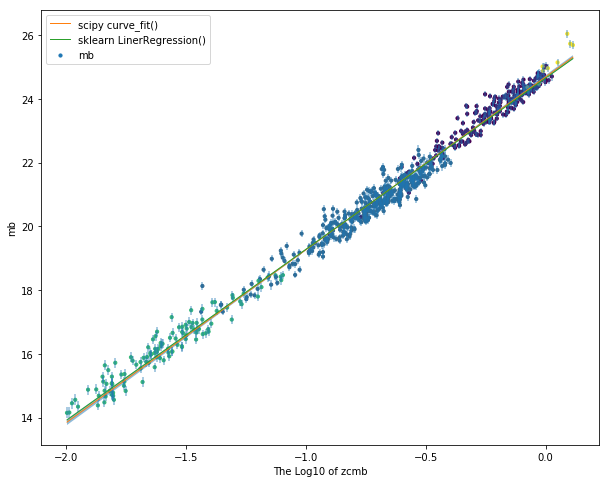

In [129]:
# Plot the data, linear model which included uncertainties, and the sklearn predict
pl.figure(figsize=(10, 8))
pl.scatter(x=log_zcmb, y=jla.mb, c=jla.set, s=10)
pl.errorbar(x=log_zcmb, y=jla.mb, yerr=jla.dmb, 
            linestyle='None', alpha=0.5, label=None)

# plot linear model
popt, pconv = popt_line, pconv_line
y_fit = line(log_zcmb, *popt)
sorter = np.argsort(log_zcmb)
pl.plot(log_zcmb[sorter], y_fit[sorter], linewidth=1.0, label='scipy curve_fit()')

# plot linear fit uncertainty
y_fit_1 = line(log_zcmb, popt[0] + 3*pconv[0, 0]**0.5, popt[1] + 3*pconv[1,1]**0.5)
y_fit_2 = line(log_zcmb, popt[0] - 3*pconv[0, 0]**0.5, popt[1] - 3*pconv[1,1]**0.5)
pl.fill_between(log_zcmb[sorter], y_fit_1[sorter], y_fit_2[sorter], alpha=0.5)

# plot sklearn prediction
y_pred = regr.predict(xvals)
pl.plot(log_zcmb[sorter], y_pred[sorter], linewidth=1.0, label='sklearn LinerRegression()')

pl.legend()
pl.xlabel('The Log10 of zcmb')
pl.ylabel('mb')

Figure 6. This plot shows the fitting results from scipy curve_fit() and scipy LinearRegression(). These two lines are very close to each other. 

# Cross valudation: Split your data into a training and test set
this is the "signature" of the machine learning approach. While this can be done using simply a random number generator
(see example)

do it using the sklear capabilities: ```skl.model_selection.train_test_split```. Read abnout the ```stratify``` funcionality of this method: it allows you to create unbiased train-test samples. In this case it is not necessary but it may be useful in your future!


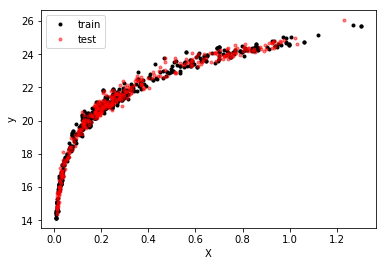

In [130]:
# handmade train-test split
Nall = len(jla)
Ntrain = int(Nall * 0.75)
train = numpy.random.randint(0, high=Nall, size=Ntrain)
test = np.setdiff1d(np.arange(Nall), train)
X_train, y_train = jla.zcmb[train], jla.mb[train]
X_test, y_test = jla.zcmb[test], jla.mb[test]
pl.plot(X_train, y_train, 'k.', label="train")
pl.plot(X_test, y_test, 'r.', alpha=0.5, label="test")
pl.xlabel("X")
pl.ylabel("y")
pl.legend()

In [0]:
#instead use sklern to split
X_train, X_test, y_train, y_test, yerr_train, yerr_test = skl.model_selection.train_test_split(
    xvals, yvals, yerr, test_size=0.33, random_state=42)


In [132]:
# fit on train set
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Plot the data, the baseline mode, and the new model, but colorcode the data based on the training or test set (instead othe survey it comes from like you had done before)

Text(0, 0.5, 'mb')

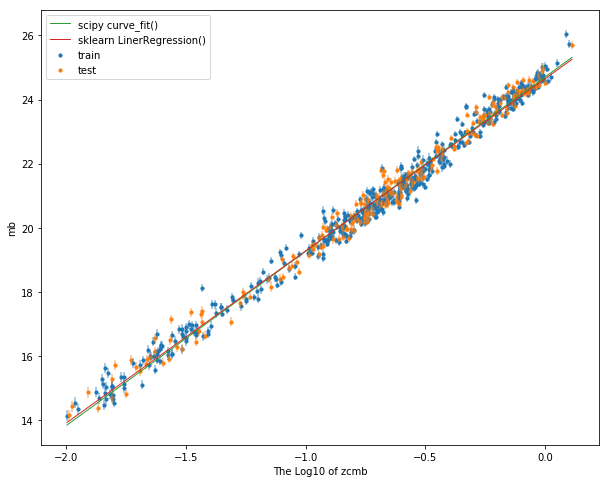

In [133]:
# Plot the train, and test dataset, linear model, and the sklearn prediction
pl.figure(figsize=(10, 8))
pl.scatter(x=X_train, y=y_train, s=10, label='train')
pl.errorbar(x=X_train, y=y_train, yerr=yerr_train, 
            linestyle='None', alpha=0.5, label=None)

pl.scatter(x=X_test, y=y_test, s=10, label='test')
pl.errorbar(x=X_test, y=y_test, yerr=yerr_test, 
            linestyle='None', alpha=0.5)

# plot linear model
popt, pconv = popt_line, pconv_line
y_fit = line(log_zcmb, *popt)
sorter = np.argsort(log_zcmb)
pl.plot(log_zcmb[sorter], y_fit[sorter], linewidth=1.0, label='scipy curve_fit()')

# plot sklearn prediction
y_pred = regr.predict(xvals)
pl.plot(log_zcmb[sorter], y_pred[sorter], linewidth=1.0, label='sklearn LinerRegression()')

pl.legend()
pl.xlabel('The Log10 of zcmb')
pl.ylabel('mb')

Figure 7. This plot shows train dataset, test dataset, and the fitting results from scipy curve_fit() and sklearn LinearRegression().

Calculate the scores of the train and test set. Make considerations about the quality of the model including how robust it is (is it overfitting?)

In [134]:
# score on train set
regr.score(X_train, y_train)

0.987704753856953

In [135]:
# score on test set
regr.score(X_test, y_test)

0.9869529602750878

The sklearn linear regression got high score on both train and test dataset, it is not overfitting. 

<span style="color:red">**Good Job!**</span>